In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from matplotlib import pyplot as plt


import kagglehub
path = kagglehub.dataset_download("idowuadamo/students-performance-in-2024-jamb")

print("Path to dataset files:", path)
df = pd.read_csv(path+"/jamb_exam_results.csv")

df.head()

Using Colab cache for faster access to the 'students-performance-in-2024-jamb' dataset.
Path to dataset files: /kaggle/input/students-performance-in-2024-jamb


,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [37]:
df = df.drop(columns='Student_ID', axis=1)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.fillna(0)

In [38]:
Y = df['jamb_score']
X = df.drop(columns='jamb_score', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)


In [39]:
vec = DictVectorizer(sparse=True)
train_dict = X_train.to_dict(orient="records")
val_dict = X_val.to_dict(orient="records")
test_dict = X_test.to_dict(orient="records")
X_train = vec.fit_transform(train_dict)
X_val = vec.transform(val_dict)
X_test = vec.transform(test_dict)

In [40]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, Y_train)
features = vec.get_feature_names_out()
index = model.tree_.feature[0]


In [41]:
print(f"Ответ на вопрос 1: {features[index]}")

Ответ на вопрос 1: study_hours_per_week


In [42]:
model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_val)
print(f"Ответ на вопрос 2: {root_mean_squared_error(Y_val, Y_pred)} (ближайший из вариантов - 42.13)")

Ответ на вопрос 2: 41.60899752457394 (ближайший из вариантов - 42.13)


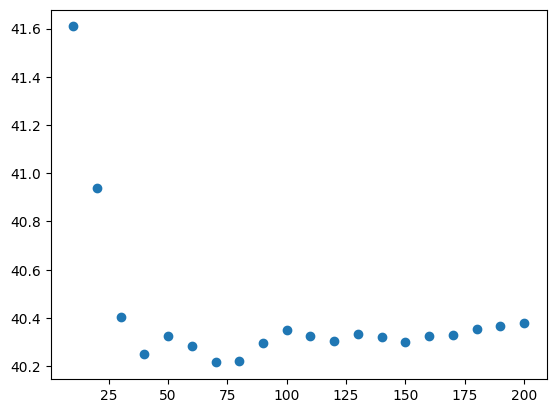

In [45]:
rmse = []
x_axis = []
for i in range(10, 201, 10):
    model = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)

    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_val)

    rmse.append(round(root_mean_squared_error(Y_val, Y_pred), 3))
    x_axis.append(i)
plt.figure()
plt.scatter(x_axis, rmse)

In [46]:
print(min(rmse), rmse[3], rmse[6], rmse[7])

40.215 40.251 40.215 40.223


Как видим, после 70 деревьев RMSE не улучшается. Возьмем ближайший ответ 80

Ответ на вопрос 3: 80

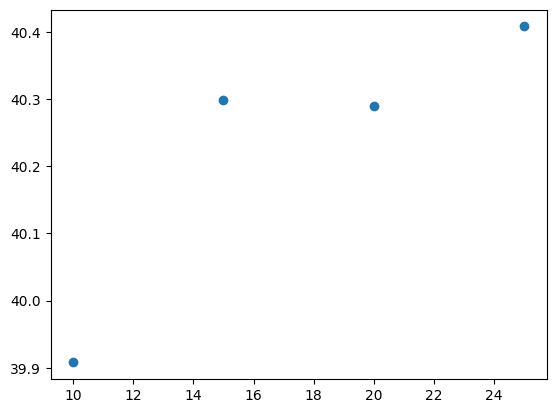

In [47]:
mean_rmse = {}
depth = [10, 15, 20, 25]

for i in depth:
    rmse = []
    for j in range(10, 201, 10):
        model = RandomForestRegressor(n_estimators=j, max_depth=i, random_state=1, n_jobs=-1)

        model.fit(X_train, Y_train)

        Y_pred = model.predict(X_val)

        rmse.append(round(root_mean_squared_error(Y_val, Y_pred), 3))
    mean_rmse[i] = np.mean(rmse)
plt.figure()
plt.scatter(list(mean_rmse.keys()), list(mean_rmse.values()))

Видно, что минимальное RMSE при max_depth = 10

Ответ на вопрос 4: 10

In [48]:
model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

model.fit(X_train, Y_train)

importances = model.feature_importances_
names = vec.get_feature_names_out()

max_importance = max(importances)
for i in range(0, len(importances)):
    if importances[i] == max_importance:
        print(names[i])
        break

study_hours_per_week


Ответ на вопрос 5: study_hours_per_week

# Ответы

1. study_hours_per_week

2. 42.13

3. 80

4. 10

5. study_hours_per_week